In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)
sc.settings.verbosity = 1
sc.logging.print_header()

%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

c:\Users\ZHH\anaconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.8 anndata==0.9.2 umap==0.5.5 numpy==1.24.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.11


# Fast I/O

In [ ]:
adata = sc.read('./Endotype/adata_endotype.h5ad')
adata.uns['log1p']["base"] = None
adata

# Bulid adata object

In [2]:
adata = sc.read_excel("Endotype_scanpy.xlsx", sheet="Integration.endotype") 
adata.obs = pd.read_excel("Endotype_scanpy.xlsx", sheet_name="Integration.meta",index_col=1)
adata.obs.index.name = None
adata.obs.Visiting_date = adata.obs.Visiting_date.astype(str)
adata.obs['Antibody'] = adata.obs['Antibody'].astype('category')
adata.obs['Antibody'] = adata.obs['Antibody'].cat.reorder_categories(['AChR+', 'MuSK+', 'SNMG', 'Control'])

adata.obs

,Number,Visiting_date,Category_1,Category_2,Status,J_type,Antibody,ClinicalType,ClinicalType_2,Immunosuppression_before,...,Onset_age,Duration,ADL_all,QOL_all,MGC_all,QMG_all,Prognosis_6m,Prognosis_12m,Steroid_response,leiden
CT001,1,2023-06-07,Control,Control,Control,Control,Control,Control,Control,Control,...,NaN,NaN,NaN,NaN,NaN,NaN,Control,Control,Control,C
CT002,2,2023-06-07,Control,Control,Control,Control,Control,Control,Control,Control,...,NaN,NaN,NaN,NaN,NaN,NaN,Control,Control,Control,C
CT003,3,2023-06-07,Control,Control,Control,Control,Control,Control,Control,Control,...,NaN,NaN,NaN,NaN,NaN,NaN,Control,Control,Control,C
CT004,4,2023-06-07,Control,Control,Control,Control,Control,Control,Control,Control,...,NaN,NaN,NaN,NaN,NaN,NaN,Control,Control,Control,C
CT005,5,2023-06-07,Control,Control,Control,Control,Control,Control,Control,Control,...,NaN,NaN,NaN,NaN,NaN,NaN,Control,Control,Control,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MG215,255,2020-03-20,MG,Naïve AChR+ MG,Pre-treatment,g_EOMG,AChR+,Generalized,EOMG,None,...,31.0,0.041667,4.0,23.0,9.0,9.0,Unchanged,Improved,Response,B
MG216,256,2021-12-17,MG,Naïve AChR+ MG,Pre-treatment,OMG,AChR+,Ocular,LOMG,None,...,53.0,0.041667,3.0,1.0,4.0,6.0,Improved,Unchanged,Response,B
MG217,257,2021-03-19,MG,Naïve AChR+ MG,Pre-treatment,g_LOMG,AChR+,Generalized,LOMG,None,...,56.0,0.645833,2.0,9.0,6.0,7.0,Improved,Improved,Response,B
MG218,258,2021-12-09,MG,Naïve AChR+ MG,Pre-treatment,g_TAMG,AChR+,Generalized,LOMG,None,...,55.0,0.645833,17.0,43.0,31.0,26.0,Improved,Improved,Non-response,B



# Pre-processing

In [3]:
adata.X.sum(axis = 1)
sc.pp.log1p(adata) #change to log counts
sc.pp.scale(adata)

In [4]:
adata_X_preview = adata.to_df()
adata_X_preview

,IL_6,IL_8,IL_10,CXCL2,IFN_gamma,CCL3,IL_17,APRIL,BAFF,IL_19,...,C5a,IFN_beta,C2,IL_4,IL_2,C9,CXCL5,CXCL4,IFN_alpha,IL_18
CT001,2.932420,-0.340126,-0.786815,-1.793671,1.228440,0.560681,1.440066,0.252611,0.779745,-0.447949,...,-0.308582,-0.468078,0.960376,-1.158756,-1.494344,-1.075714,-1.474546,-1.107891,-1.518860,-1.012087
CT002,-0.626876,-0.536533,-0.786815,-2.272730,0.870814,0.560681,0.636083,-0.180261,0.311492,-0.447949,...,-0.820362,1.155251,0.400232,-1.158756,-1.494344,-0.665094,-2.520644,-1.631780,-1.518860,-3.050067
CT003,-0.345030,-0.340126,-1.987470,-1.947037,1.066707,0.460264,0.636083,0.237435,0.283411,-0.423154,...,0.549498,-0.468078,-0.180933,-2.495010,-1.114825,-1.634023,-2.094343,0.372470,-2.532079,-2.712164
CT004,0.361333,-0.310581,-1.662318,-2.615839,0.873270,0.509251,0.184708,-0.170219,0.074837,-0.447949,...,-0.231244,-0.468078,1.676717,-1.158756,-1.114825,-1.194609,-1.844190,-0.359597,-1.998917,-1.294069
CT005,-0.221487,0.529407,-1.662318,-1.464565,1.151040,0.759065,1.440066,1.160514,0.795418,-0.473655,...,-1.309720,1.155251,1.139991,-1.158756,-0.335307,-1.553268,-1.189818,0.875309,-1.046801,0.357212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MG215,-0.054480,-0.970387,-0.387796,0.001536,-1.014996,-1.421874,0.363023,-0.411791,0.045821,0.386308,...,-1.367197,1.516427,-0.715948,-0.700595,0.371898,0.812448,-0.271806,-0.760812,0.121700,-0.318698
MG216,-0.054480,-0.835978,0.027259,-1.327435,-1.257301,-0.948414,-1.212095,-0.677161,0.387462,0.621952,...,-0.746058,-0.468078,0.550620,-0.163947,-0.956678,0.319478,-1.233381,-1.418840,-1.149166,-0.070794
MG217,-0.054480,-1.305576,-0.997991,-0.388118,-1.014996,-1.421874,-1.212095,-1.762961,-1.543241,0.386308,...,-5.261322,-0.468078,-1.125449,-0.163947,-0.146401,0.909835,-0.029636,-1.884874,0.598813,-0.400075
MG218,-0.579358,-0.835978,0.027259,0.474089,-1.257301,-1.421874,-1.212095,-0.210723,-0.232360,-0.049214,...,0.261542,-0.468078,-0.866049,0.711282,-0.146401,0.617686,0.640438,0.370273,1.119430,0.913937


In [7]:
adata.write('adata_endotype.h5ad')

# PCA

c:\Users\ZHH\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\ZHH\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\ZHH\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


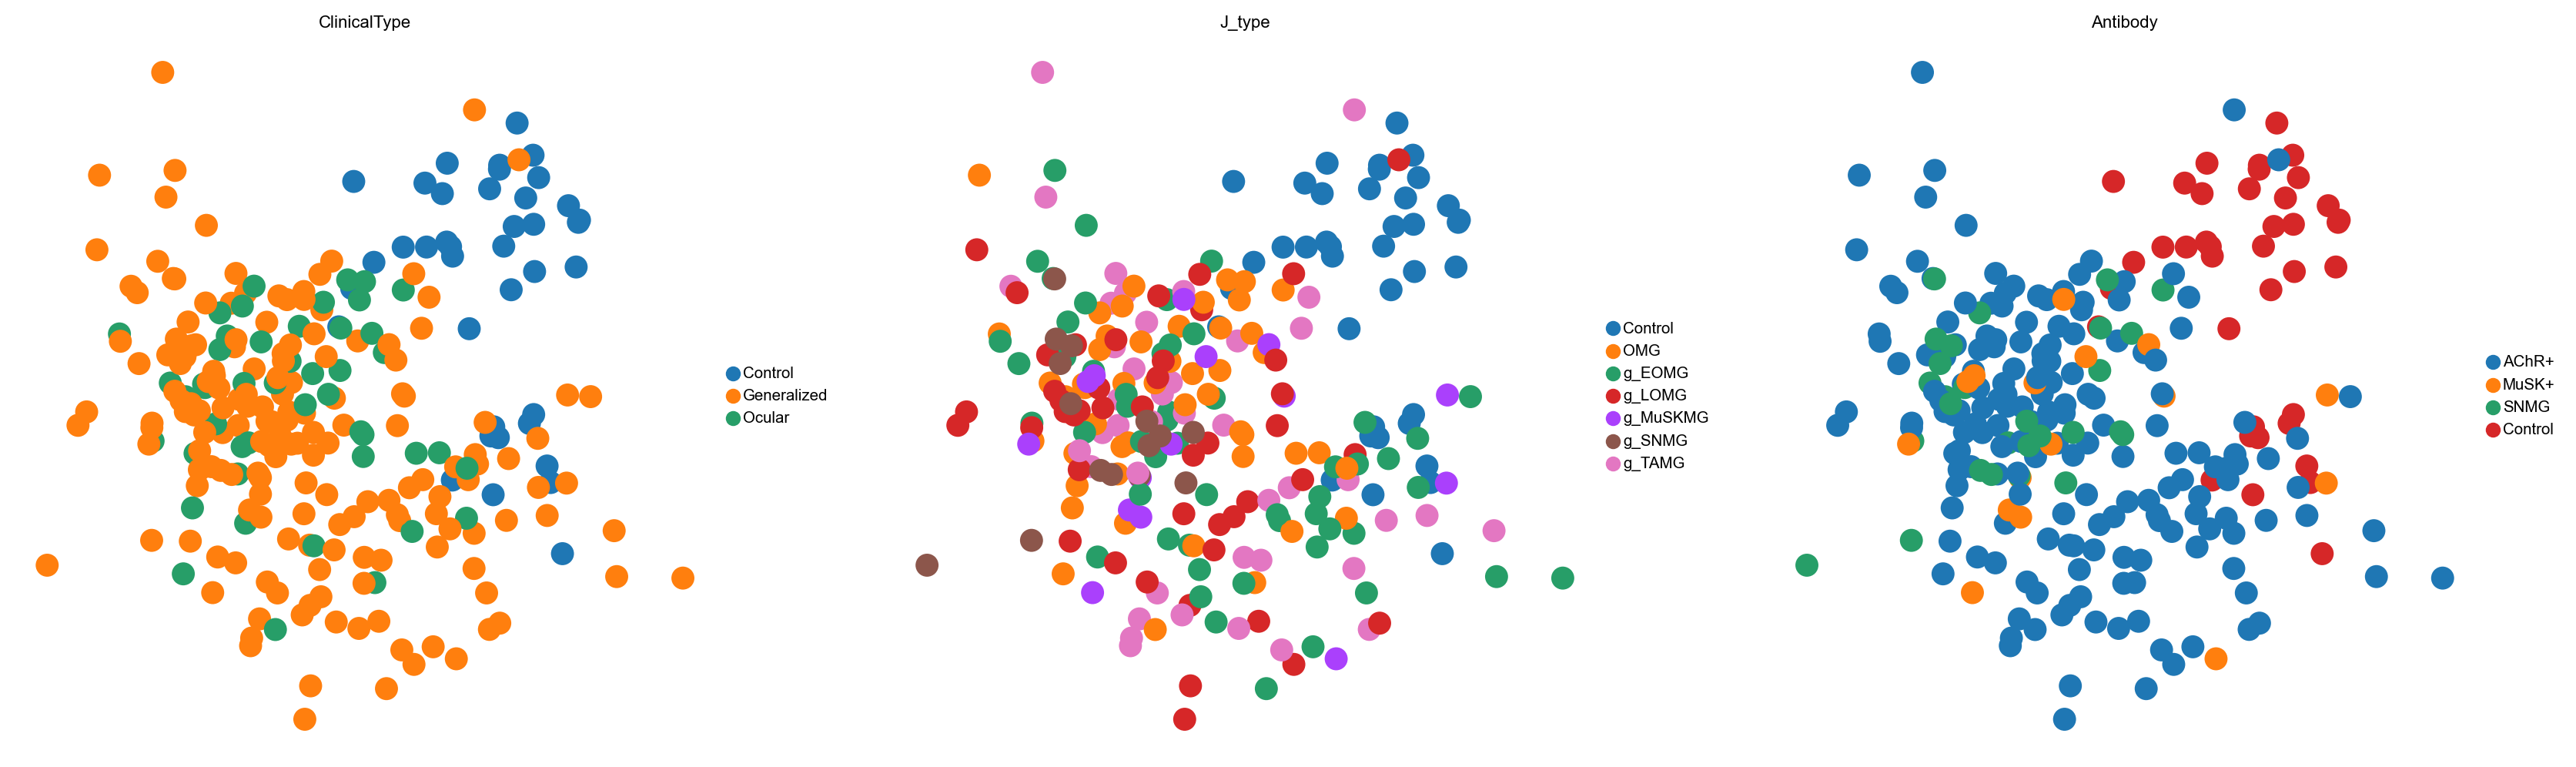

In [5]:
sc.set_figure_params(dpi=100, figsize=[6,6],  fontsize=8,  color_map= 'Set1',transparent=True, frameon=False)

sc.pp.pca(adata)
sc.pl.pca(adata, color= ['ClinicalType',  'J_type', 'Antibody'])

# Umap

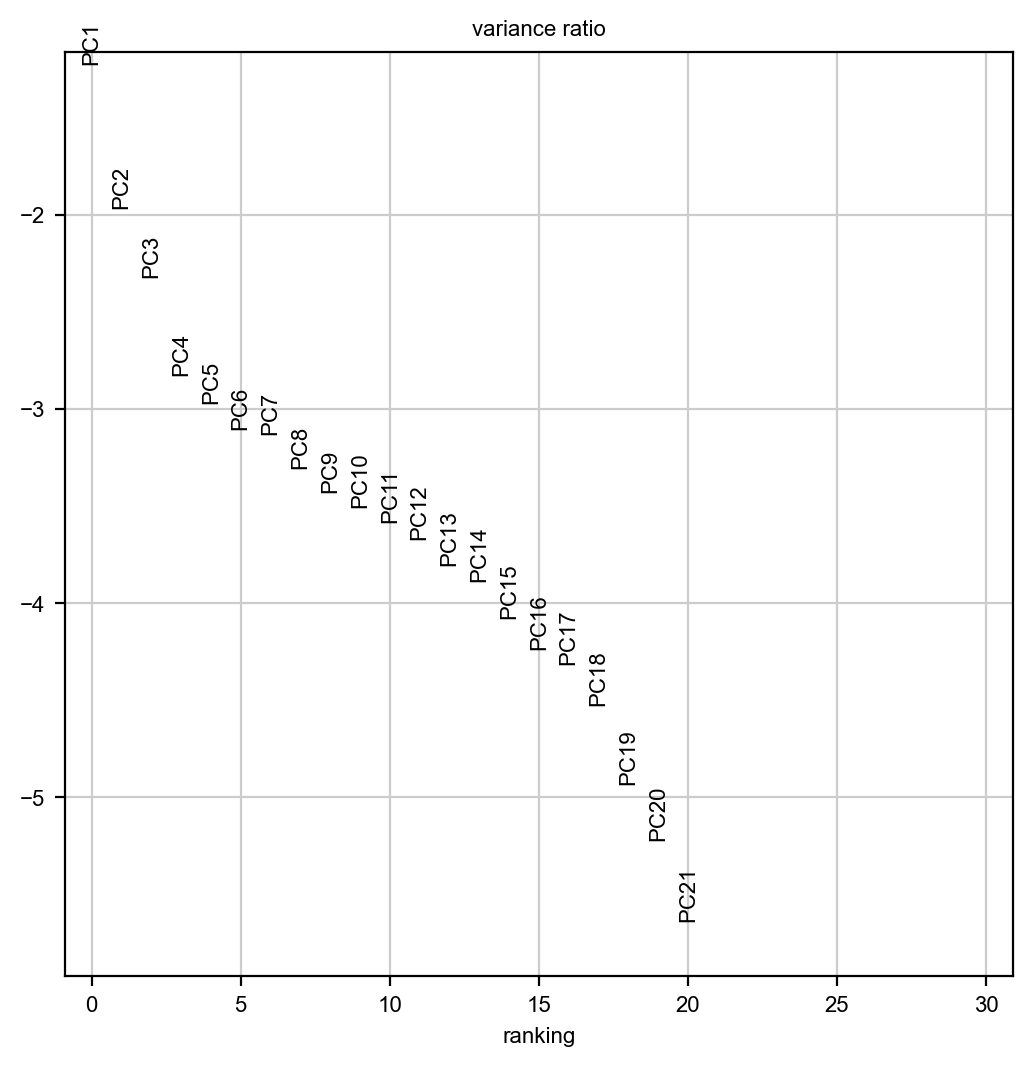

In [8]:
sc.pl.pca_variance_ratio(adata, log=True)

c:\Users\ZHH\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\ZHH\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\ZHH\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\ZHH\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\ZHH\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignor

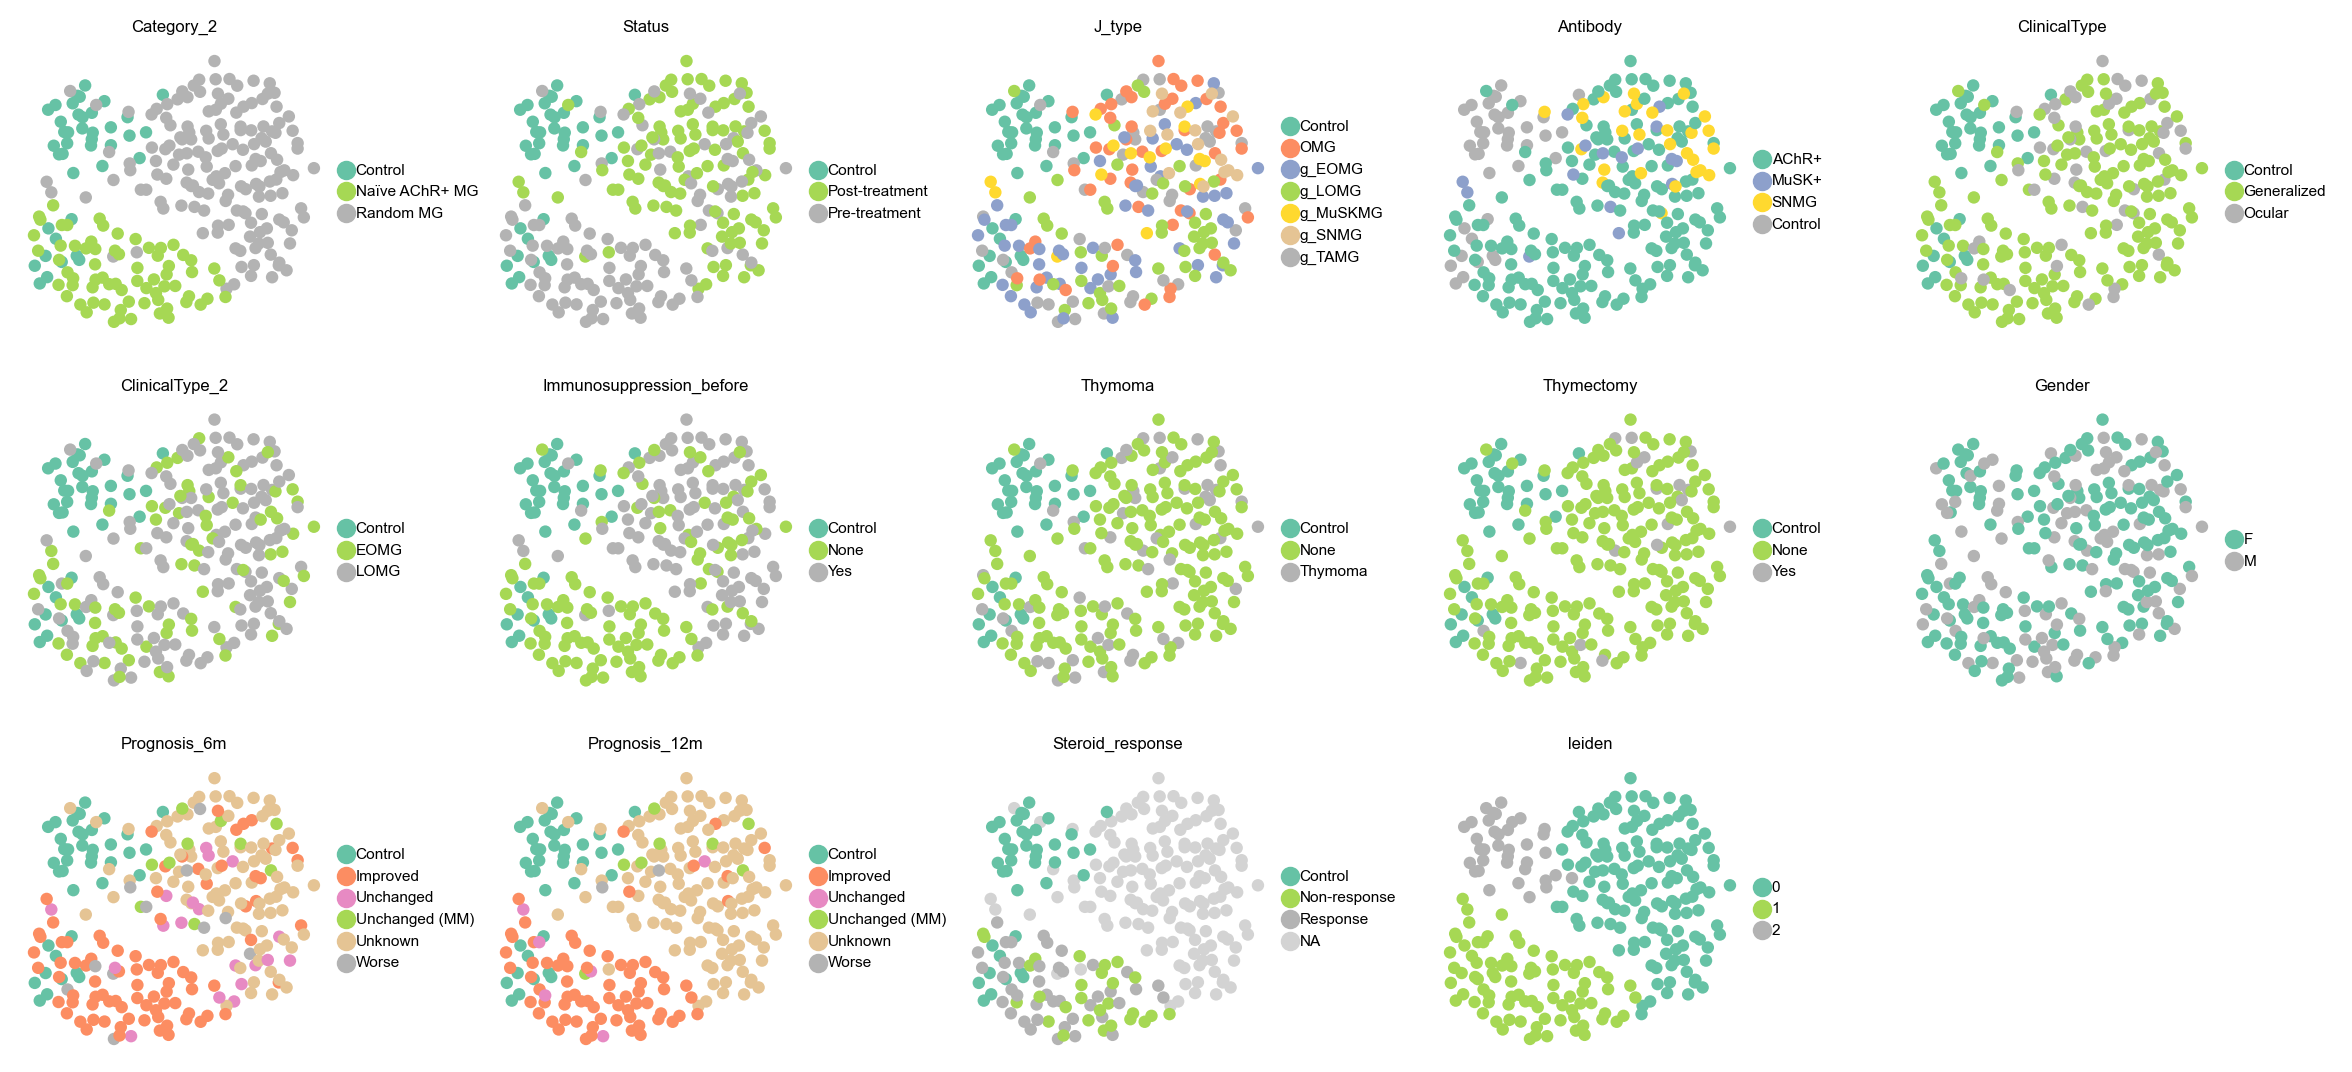

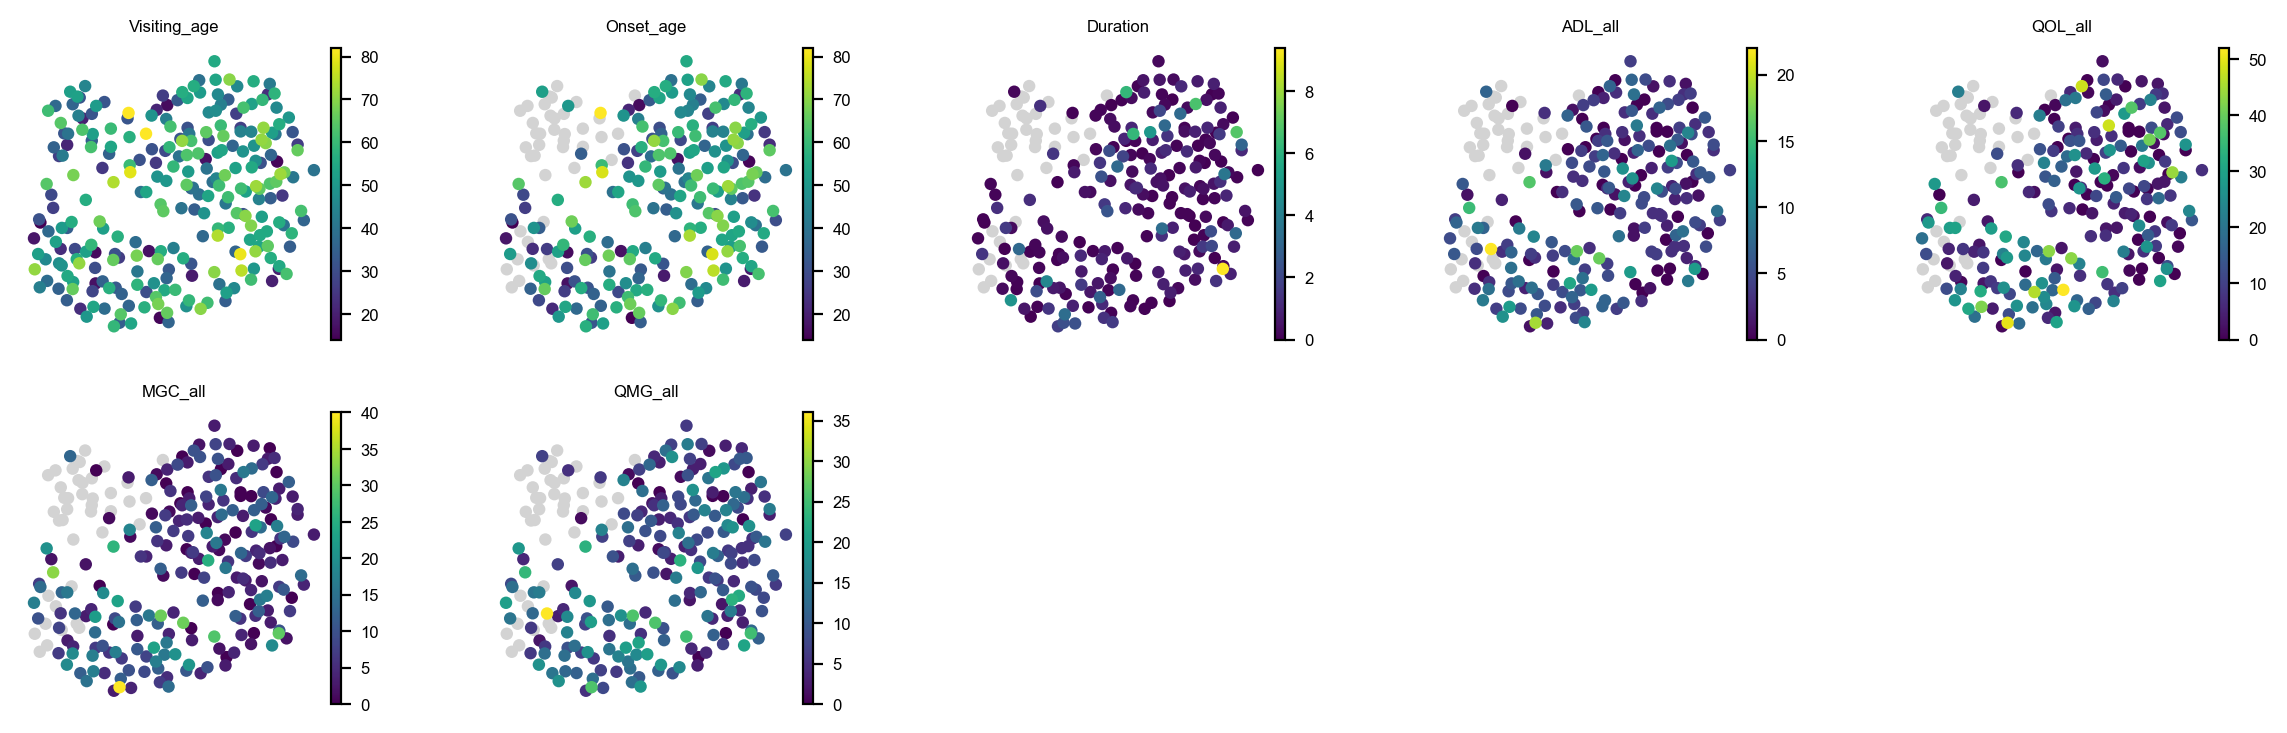

In [6]:
sc.set_figure_params(dpi=100, figsize=[2,2],  dpi_save = 100, fontsize=6,   transparent=True, frameon=False)

sc.pp.neighbors(adata, n_neighbors=100, n_pcs=50)  #n_neighbors=20, n_pcs=50  n_neighbors=30, n_pcs=50
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added = "leiden", resolution=0.6) 
#sc.pl.umap(adata, color=['Antibody', 'J_type', 'Thymoma', 'ClinicalType', 'leiden'], size=80, ncols = 2, palette = 'Set2',)
sc.pl.umap(adata, color=['Category_2', 'Status', 'J_type', 'Antibody',
       'ClinicalType', 'ClinicalType_2', 'Immunosuppression_before', 'Thymoma',
       'Thymectomy', 'Gender', 'Prognosis_6m',
       'Prognosis_12m', 'Steroid_response', 'leiden'], size=80, ncols = 5, palette = 'Set2',)
sc.pl.umap(adata, color=['Visiting_age', 'Onset_age', 'Duration',
       'ADL_all', 'QOL_all', 'MGC_all', 'QMG_all', ], size=80, ncols = 5, color_map = 'viridis',)

c:\Users\ZHH\anaconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


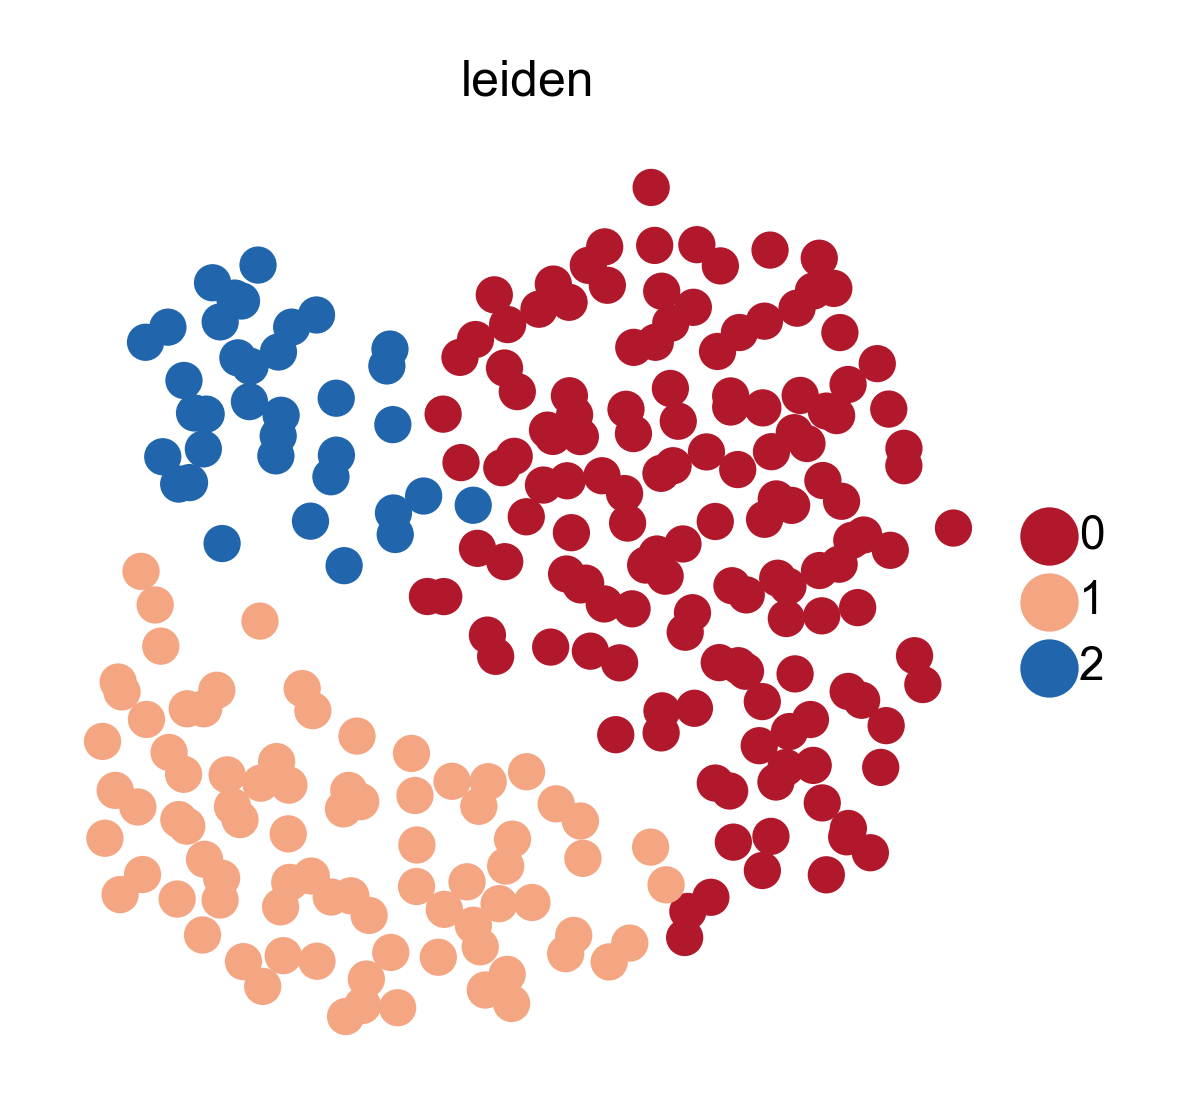

In [13]:
sc.set_figure_params(dpi=300, dpi_save = 300,figsize=[2,2],  fontsize=6,  color_map= 'viridis_r',transparent=True, frameon=False)

sc.pl.umap(adata, color = 'leiden', palette ={
        "0": "#b2182b",
        "1": "#f4a582",
        "2": '#2166ac',
    }, legend_loc = 'right margin', size=80, save='1_accendentdeath.pdf')

# Overall

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr


Customed_cmap = clr.LinearSegmentedColormap.from_list('custom blue', ["#2166ac", "#ffffff","#b2182b"], N=256)

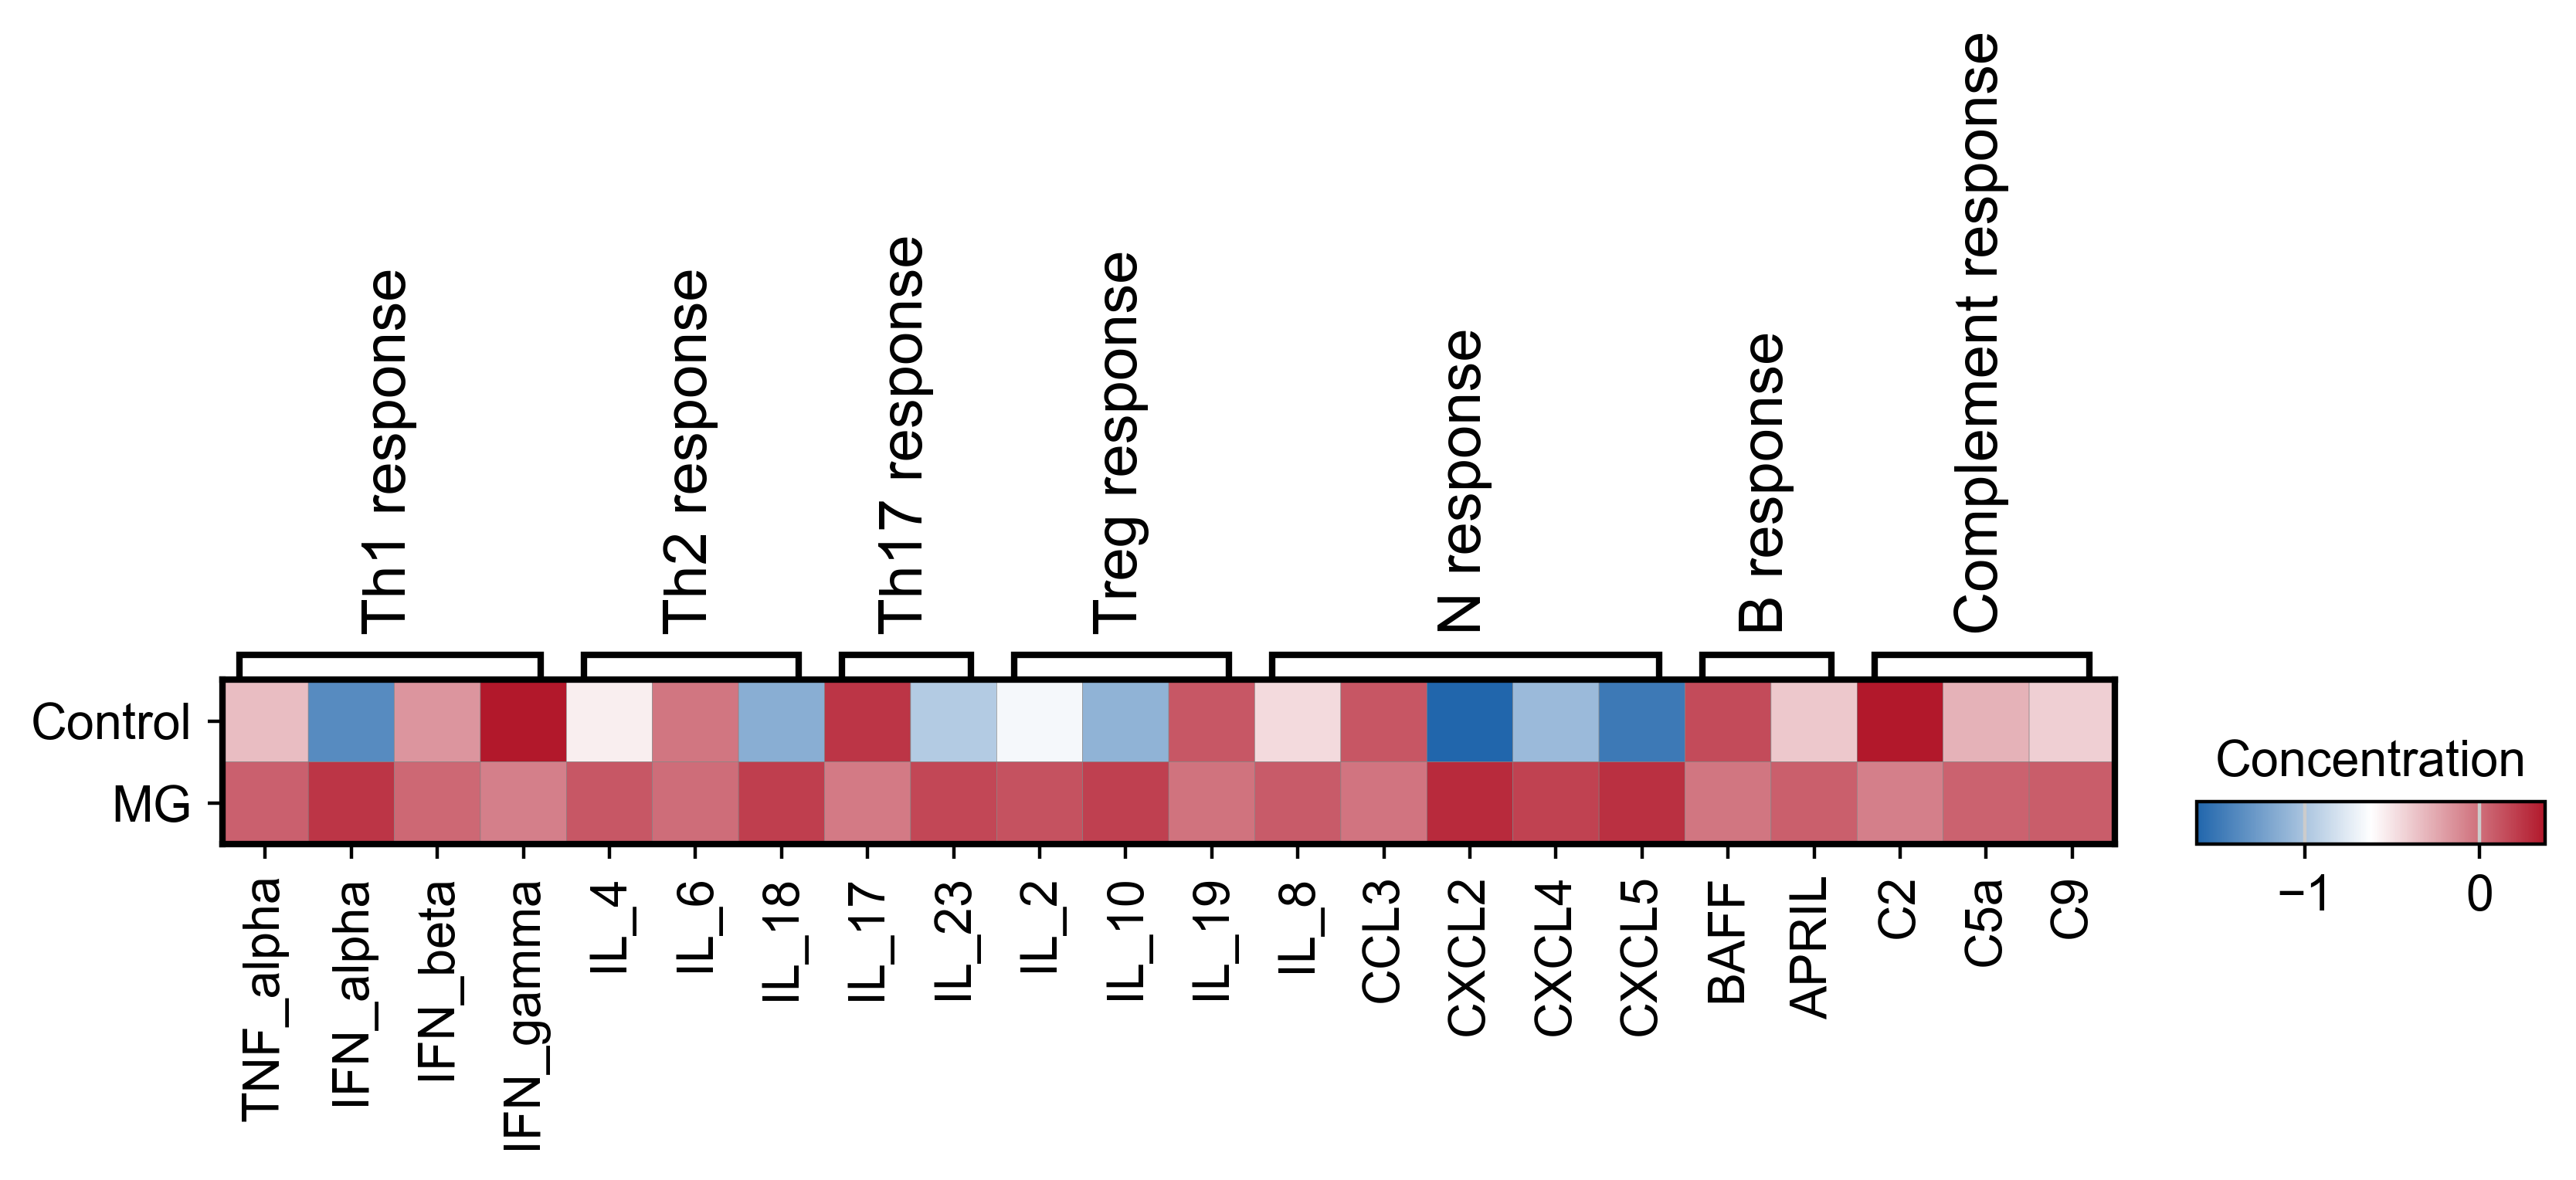

In [15]:
sc.set_figure_params(dpi=200, dpi_save = 300, figsize=[5,5],  fontsize=14,  color_map= 'viridis_r',transparent=True, frameon=False)

marker_cytokines_dict = {
    'Th1 response': ['TNF_alpha', 'IFN_alpha', 'IFN_beta','IFN_gamma'],
    'Th2 response': ['IL_4', 'IL_6', 'IL_18'],
    'Th17 response': ['IL_17', 'IL_23'],
    'Treg response': [ 'IL_2', 'IL_10', 'IL_19'],
    'N response': ['IL_8', 'CCL3', 'CXCL2', 'CXCL4', 'CXCL5'],
    'B response': ['BAFF', 'APRIL'],
    'Complement response': ['C2', 'C5a', 'C9'],
}


sc.pl.matrixplot(adata, marker_cytokines_dict, 'Category_1', dendrogram=False,# swap_axes=True,
                 colorbar_title='Concentration',   cmap=Customed_cmap, save='adata_Integration')

# Random MG vs. CT

In [17]:
adata = sc.read_excel("Endotype_scanpy.xlsx", sheet="Integration.endotype") #, first_column_names='Bio_ID'# 
adata.obs = pd.read_excel("Endotype_scanpy.xlsx", sheet_name="Integration.meta",index_col=1)
adata.obs.index.name = None
adata.obs.Visiting_date = adata.obs.Visiting_date.astype(str)

sc.pp.scale(adata)

# set adata.obs['Antibody'] order for plotting by [AChR+, MuSK, SeRO_, Normal]
adata.obs['Antibody'] = adata.obs['Antibody'].astype('category')
adata.obs['Antibody'] = adata.obs['Antibody'].cat.reorder_categories(['AChR+', 'MuSK+', 'SNMG', 'Control'])
adata.obs['Antibody'] = adata.obs['Antibody'].astype('category')    

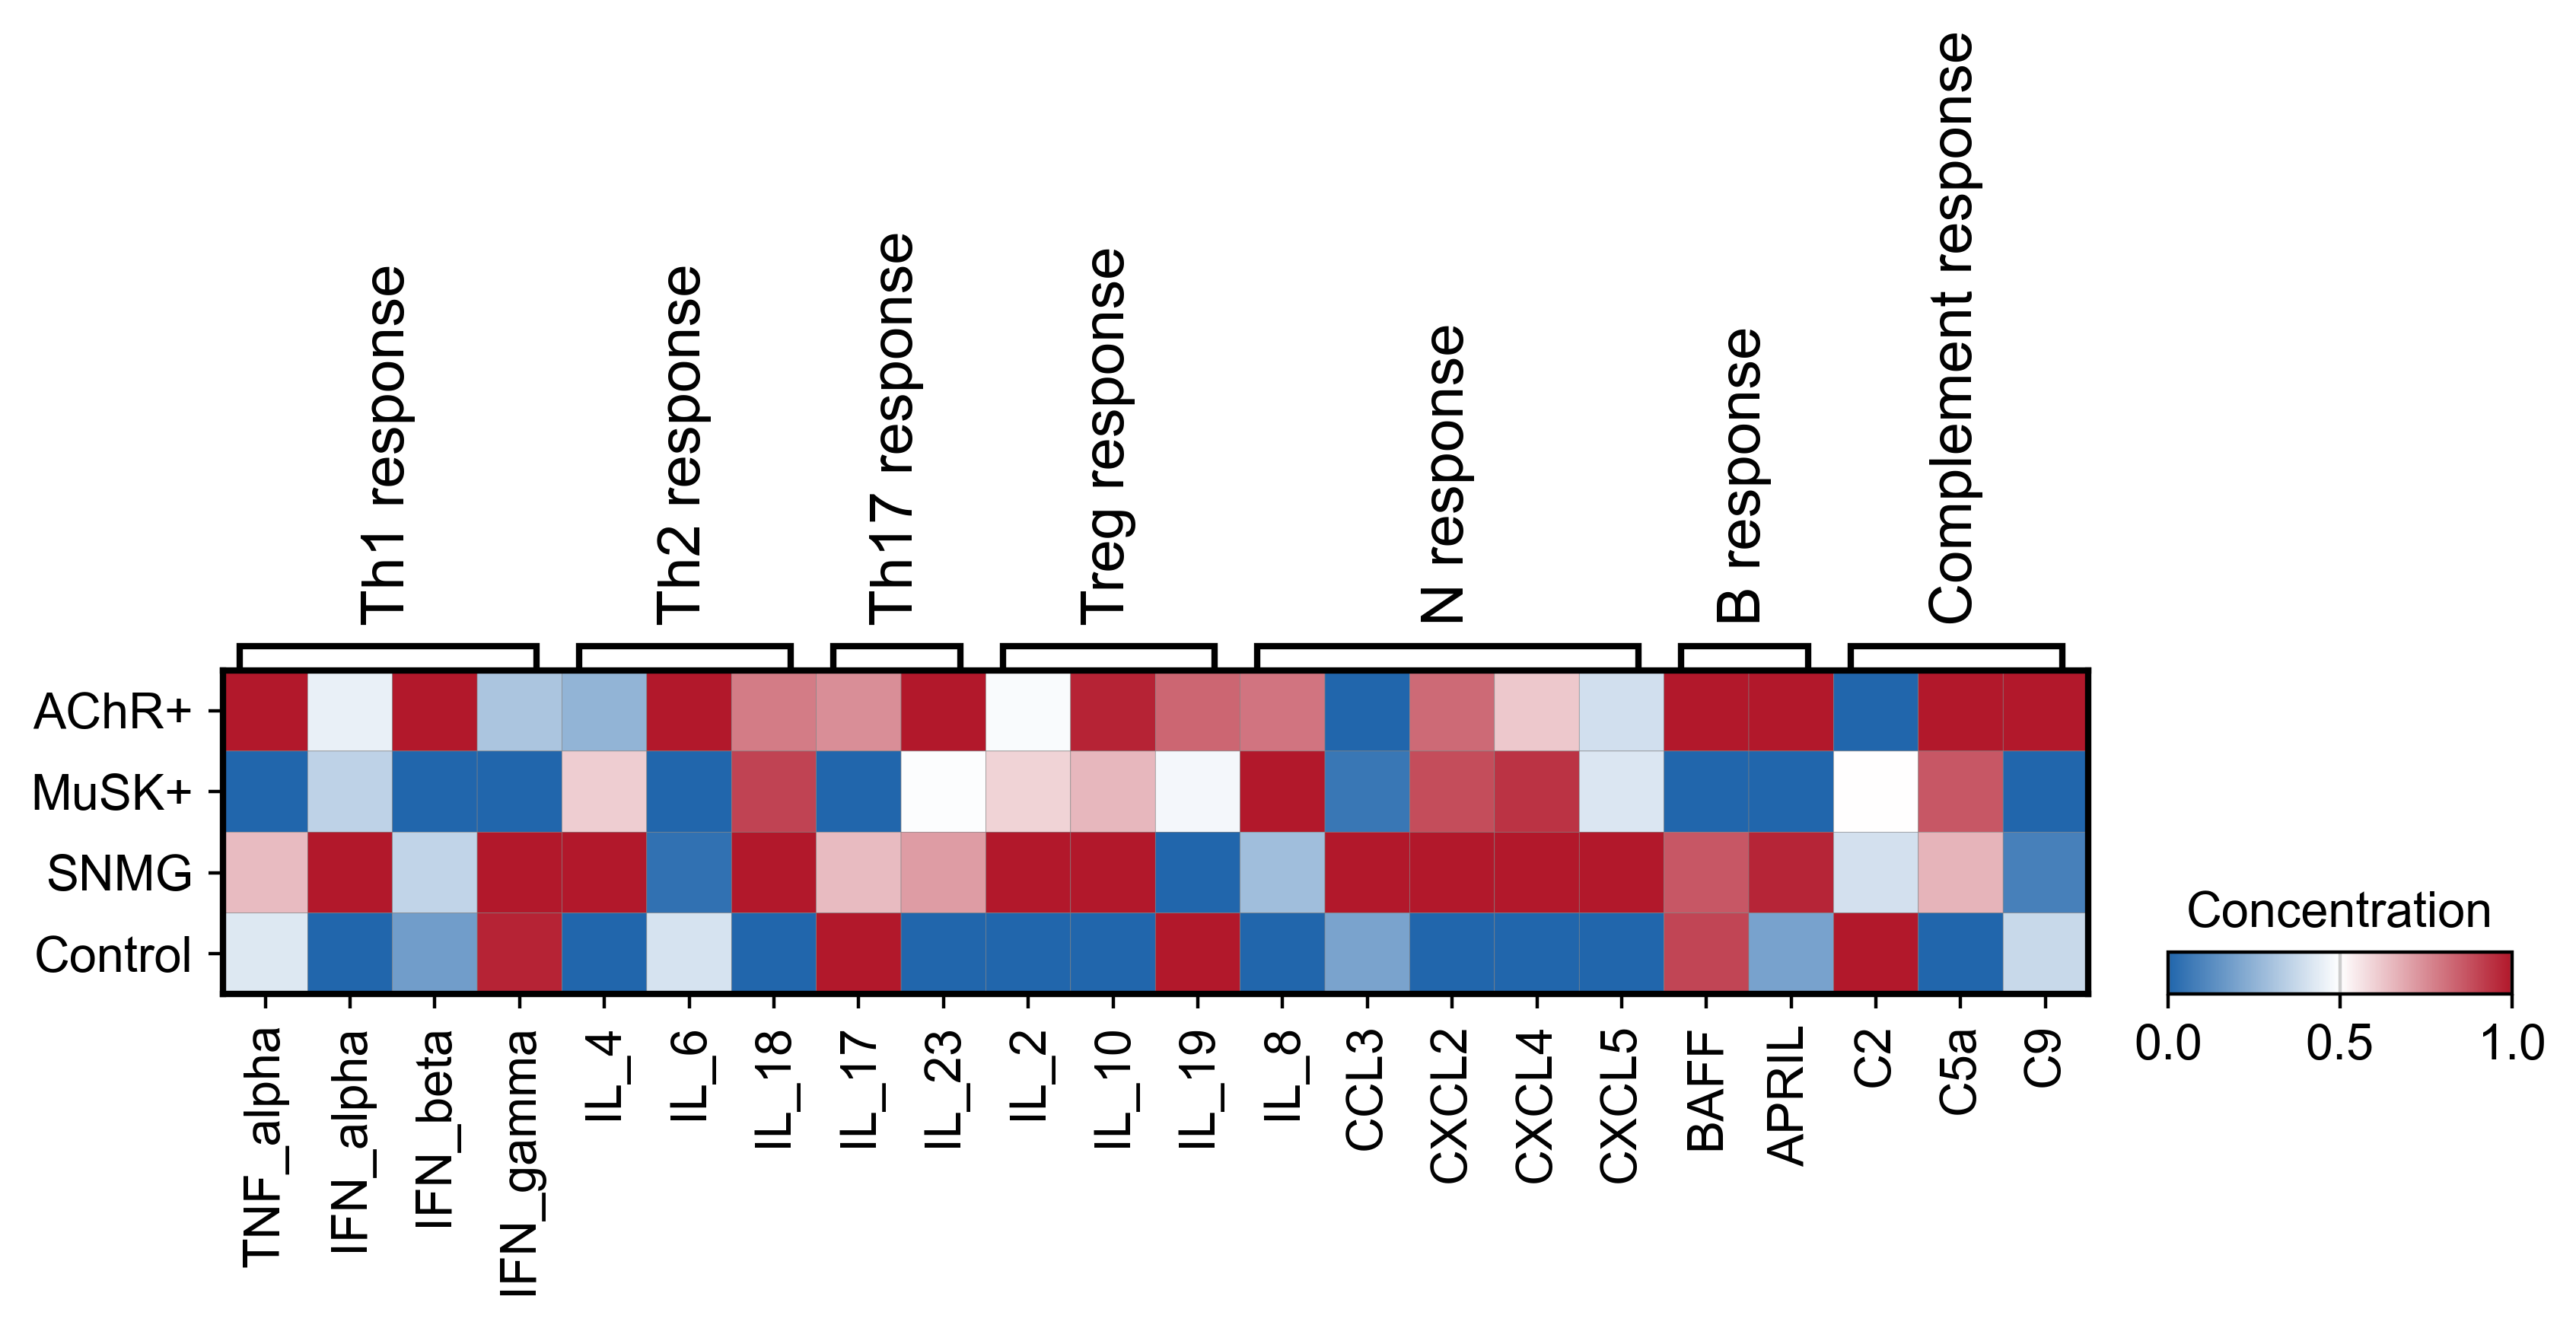

In [18]:
sc.set_figure_params(dpi=200, dpi_save = 300, figsize=[5,5],  fontsize=14,  color_map= 'viridis_r',transparent=True, frameon=False)

marker_cytokines_dict = {
    'Th1 response': ['TNF_alpha', 'IFN_alpha', 'IFN_beta','IFN_gamma'],
    'Th2 response': ['IL_4', 'IL_6', 'IL_18'],
    'Th17 response': ['IL_17', 'IL_23'],
    'Treg response': [ 'IL_2', 'IL_10', 'IL_19'],
    'N response': ['IL_8', 'CCL3', 'CXCL2', 'CXCL4', 'CXCL5'],
    'B response': ['BAFF', 'APRIL'],
    'Complement response': ['C2', 'C5a', 'C9'],
}


sc.pl.matrixplot(adata, marker_cytokines_dict, 'Antibody', dendrogram=False,# swap_axes=True,
                 colorbar_title='Concentration',  standard_scale='var', cmap=Customed_cmap, save='adata_rMG')

# Naive AChR+ MG

In [25]:
adata = sc.read_excel("Endotype_scanpy.xlsx", sheet="Integration.endotype") #, first_column_names='Bio_ID'# 
adata.obs = pd.read_excel("Endotype_scanpy.xlsx", sheet_name="Integration.meta",index_col=1)
adata.obs.index.name = None
adata.obs.Visting_date = adata.obs.Visiting_date.astype(str)

adata_Naive = adata[adata.obs['Category_2'] != 'Random MG', :]

adata_Naive.obs['Antibody'] = adata_Naive.obs['Antibody'].astype('category')
adata_Naive.obs['Steroid_response'] = adata_Naive.obs['Steroid_response'].astype('category')
adata_Naive.obs['Steroid_response'] = adata_Naive.obs['Steroid_response'].cat.reorder_categories(["Non-response", "Response", "Control"])

adata_Naive

C:\Users\ZHH\AppData\Local\Temp\ipykernel_1448\2586920118.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  adata.obs.Visting_date = adata.obs.Visiting_date.astype(str)
C:\Users\ZHH\AppData\Local\Temp\ipykernel_1448\2586920118.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_Naive.obs['Antibody'] = adata_Naive.obs['Antibody'].astype('category')


AnnData object with n_obs × n_vars = 108 × 22
    obs: 'Number', 'New_Only_ID', 'Visiting_date', 'Category_1', 'Category_2', 'Status', 'J_type', 'Antibody', 'ClinicalType', 'ClinicalType_2', 'Immunosuppression_before', 'Thymoma', 'Thymectomy', 'Gender', 'Visiting_age', 'Onset_age', 'Duration', 'ADL_all', 'QOL_all', 'MGC_all', 'QMG_all', 'Prognosis_6m', 'Prognosis_12m', 'Steroid_response', 'leiden'

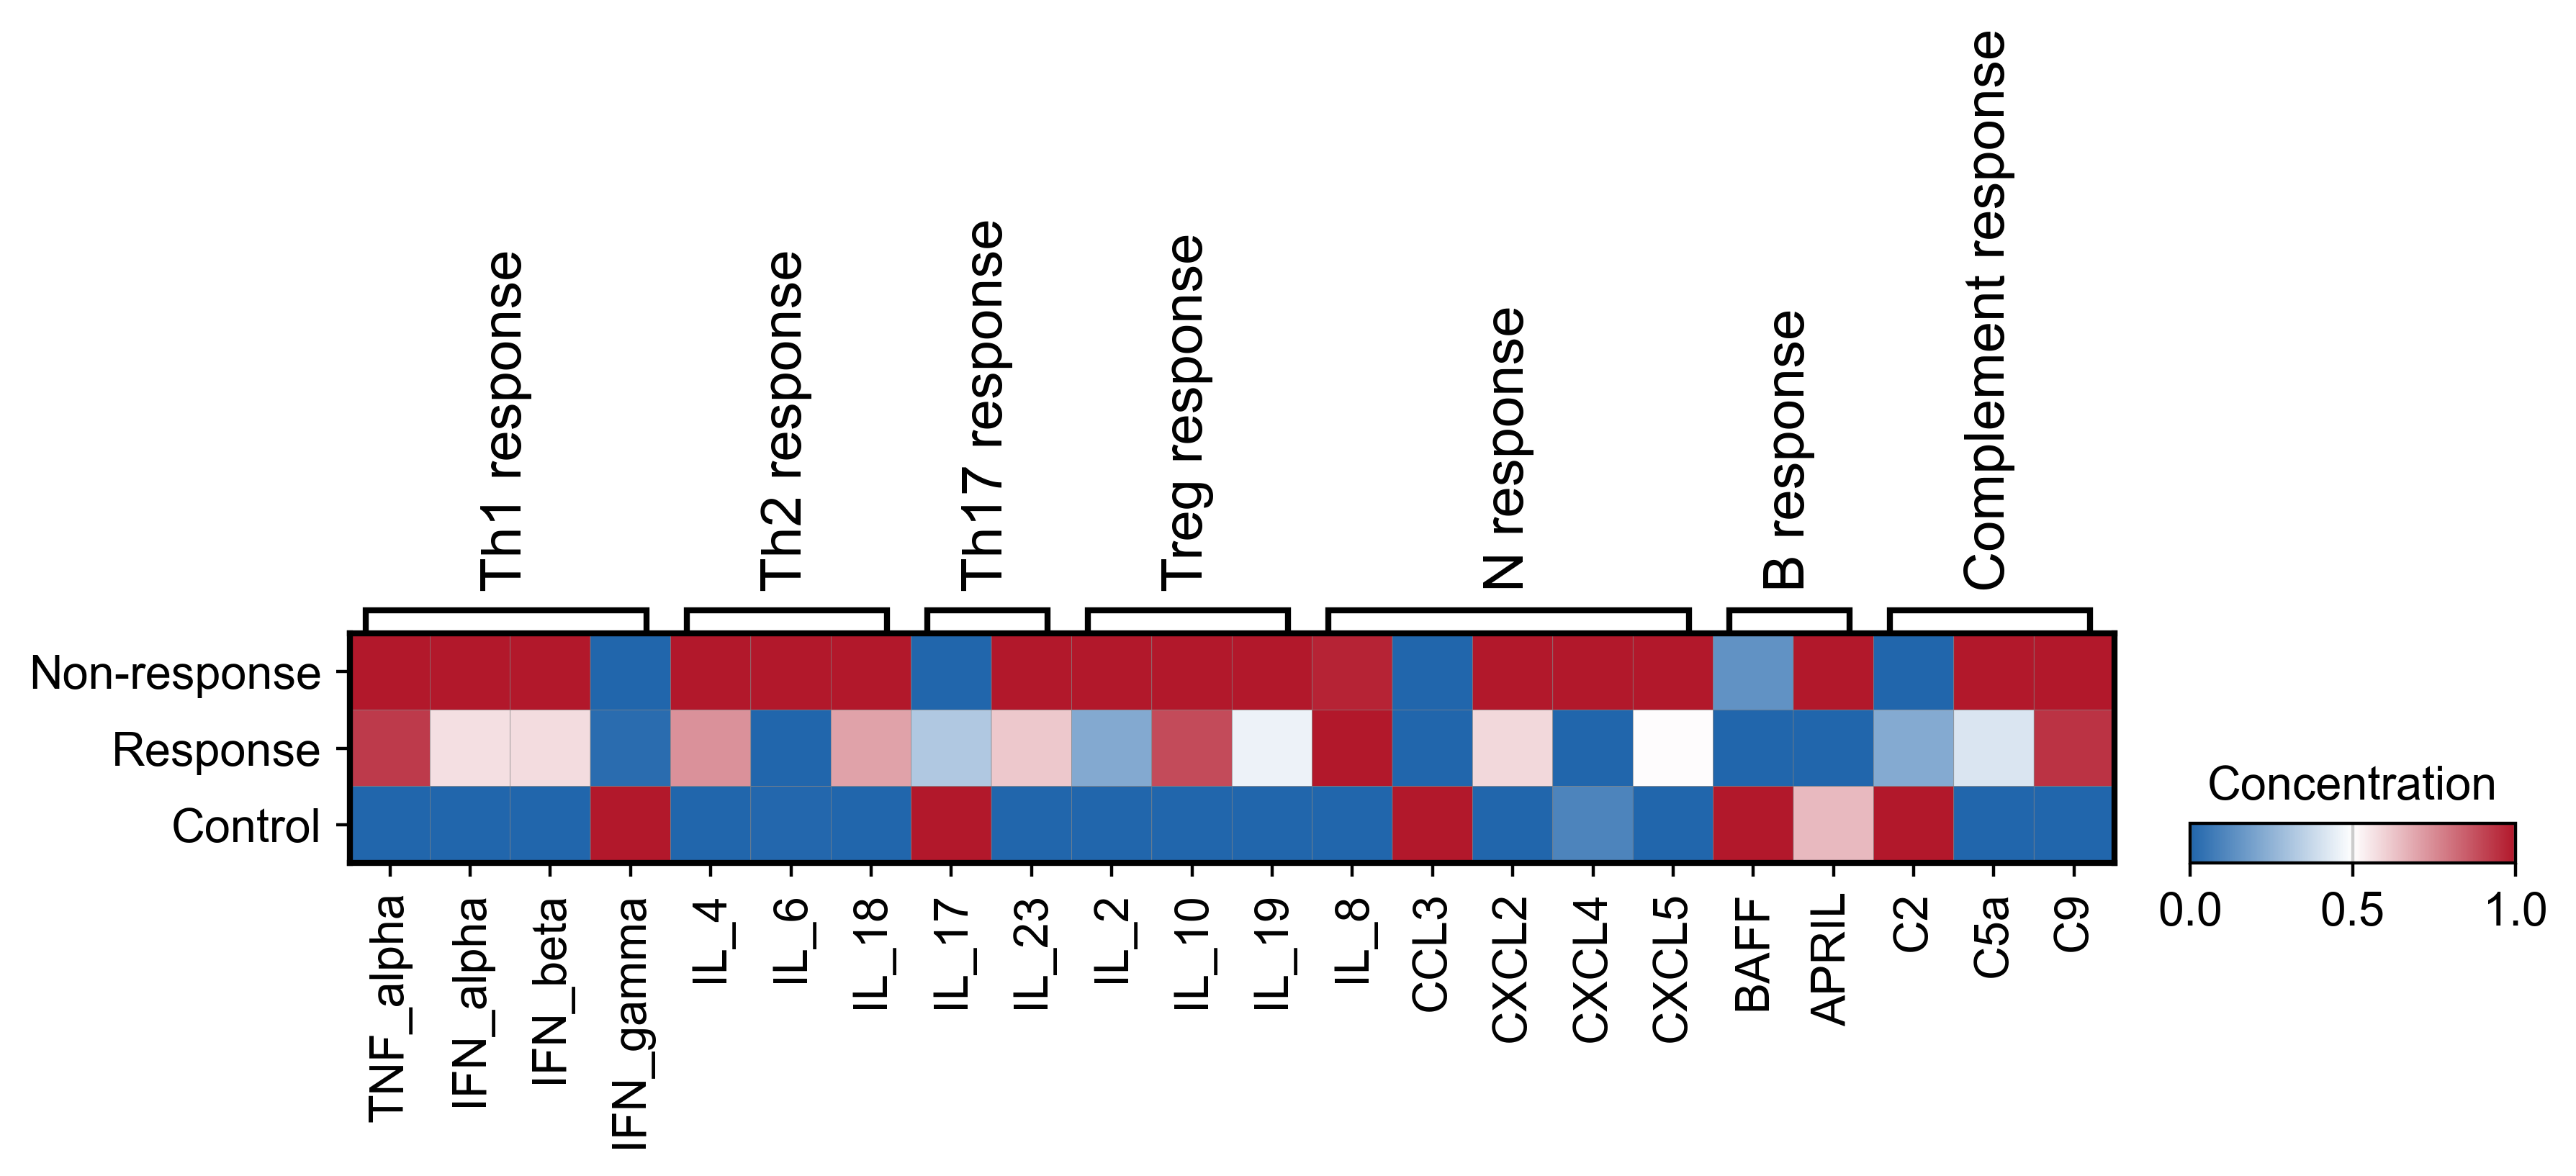

In [26]:
sc.set_figure_params(dpi=200, dpi_save = 300, figsize=[5,5],  fontsize=14,  color_map= 'viridis_r',transparent=True, frameon=False)

marker_cytokines_dict = {
    'Th1 response': ['TNF_alpha', 'IFN_alpha', 'IFN_beta','IFN_gamma'],
    'Th2 response': ['IL_4', 'IL_6', 'IL_18'],
    'Th17 response': ['IL_17', 'IL_23'],
    'Treg response': [ 'IL_2', 'IL_10', 'IL_19'],
    'N response': ['IL_8', 'CCL3', 'CXCL2', 'CXCL4', 'CXCL5'],
    'B response': ['BAFF', 'APRIL'],
    'Complement response': ['C2', 'C5a', 'C9'],
}

sc.pl.matrixplot(adata_Naive, marker_cytokines_dict, 'Steroid_response', dendrogram=False,# swap_axes=True,
                 colorbar_title='Concentration',  standard_scale='var', cmap=Customed_cmap, save='naive MG Drug_1y cytokines')